In [3]:
import gzip
import json
import pandas as pd
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import joblib

df = pd.read_csv('D:/slu/risk-pretend/S10_data.csv',index_col = 0)
df = df["2023-01-01":]
df.index = pd.to_datetime(df.index)

df['volumn'] = df['sell'] + df['buy']
df['volumn_r'] = df['sell_r'] + df['buy_r']
df['volumn_count'] = df['sell_count'] + df['buy_count']

# 可能的目标变量
# 前1%volumn样本
top_1_pct = int(len(df) * 0.01)
threshold_volumn = df['volumn'].nlargest(top_1_pct).min()
df['volumn_top_1pct'] = 0
df.loc[df['volumn'] >= threshold_volumn, 'volumn_top_1pct'] = 1

# 前1%sell样本
threshold_sell = df['sell'].nlargest(top_1_pct).min()
df['sell_top_1pct'] = 0
df.loc[df['sell'] >= threshold_sell, 'sell_top_1pct'] = 1

# 前1%buy样本
threshold_buy = df['buy'].nlargest(top_1_pct).min()
df['buy_top_1pct'] = 0
df.loc[df['buy'] >= threshold_buy, 'buy_top_1pct'] = 1

# 前1%volumn_r样本
threshold_volumn_r = df['volumn_r'].nlargest(top_1_pct).min()
df['volumn_r_top_1pct'] = 0
df.loc[df['volumn_r'] >= threshold_volumn_r, 'volumn_r_top_1pct'] = 1

# 前1%buy_r样本
threshold_buy_r = df['buy_r'].nlargest(top_1_pct).min()
df['buy_r_top_1pct'] = 0
df.loc[df['buy_r'] >= threshold_buy_r, 'buy_r_top_1pct'] = 1

# 前1%sell_r样本
threshold_sell_r = df['sell_r'].nlargest(top_1_pct).min()
df['sell_r_top_1pct'] = 0
df.loc[df['sell_r'] >= threshold_sell_r, 'sell_r_top_1pct'] = 1

# 前1%volumn_count样本
threshold_volumn_count = df['volumn_count'].nlargest(top_1_pct).min()
df['volumn_count_top_1pct'] = 0
df.loc[df['volumn_count'] >= threshold_volumn_count, 'volumn_count_top_1pct'] = 1

# 前1%buy_count样本
threshold_buy_count = df['buy_count'].nlargest(top_1_pct).min()
df['buy_count_top_1pct'] = 0
df.loc[df['buy_count'] >= threshold_buy_count, 'buy_count_top_1pct'] = 1

# 前1%sell_count样本
threshold_sell_count = df['sell_count'].nlargest(top_1_pct).min()
df['sell_count_top_1pct'] = 0
df.loc[df['sell_count'] >= threshold_sell_count, 'sell_count_top_1pct'] = 1

# 全部前1%
df['all_1pct'] = 0
df.loc[(df['volumn_top_1pct']==1)&(df['sell_top_1pct']==1)&(df['buy_top_1pct']==1)&(df['volumn_r_top_1pct']==1)&(df['buy_r_top_1pct']==1)&(df['sell_r_top_1pct']==1)&(df['volumn_count_top_1pct']==1)&(df['buy_count_top_1pct']==1)&(df['sell_count_top_1pct']==1),'all_1pct'] = 1


# volumn相关前1%
df['volumn_all_1pct'] = 0
df.loc[(df['volumn_top_1pct']==1)&(df['volumn_r_top_1pct']==1)&(df['volumn_count_top_1pct']==1),'volumn_all_1pct'] = 1
# buy相关前1%
df['buy_all_1pct'] = 0
df.loc[(df['buy_top_1pct']==1)&(df['buy_r_top_1pct']==1)&(df['buy_count_top_1pct']==1),'buy_all_1pct'] = 1
# sell相关前1%
df['sell_all_1pct'] = 0
df.loc[(df['sell_top_1pct']==1)&(df['sell_r_top_1pct']==1)&(df['sell_count_top_1pct']==1),'sell_all_1pct'] = 1

# rf_all = joblib.load("D:/slu/risk-pretend/plot/model_all_1pct.pkl")
pred_all = pd.read_csv("D:/slu/risk-pretend/plot/pred_all_1pct_2023.csv")


In [39]:
pred_volumn_all = pd.read_csv("D:/slu/risk-pretend/plot/pred_volumn_all_1pct_2023.csv")
pred_sell_all = pd.read_csv("D:/slu/risk-pretend/plot/pred_sell_all_1pct_2023.csv")
pred_buy_all = pd.read_csv("D:/slu/risk-pretend/plot/pred_buy_all_1pct_2023.csv")

pred_all.index = pd.to_datetime(pred_all['t'])
pred_volumn_all.index = pd.to_datetime(pred_volumn_all['t'])
pred_sell_all.index = pd.to_datetime(pred_sell_all['t'])
pred_buy_all.index = pd.to_datetime(pred_buy_all['t'])

df['pred_all'] = 0
df.loc[pred_all[pred_all['pred']==1].index,'pred_all'] = 40000
df['pred_volumn_all'] = 0
df.loc[pred_volumn_all[pred_volumn_all['pred']==1].index,'pred_volumn_all'] = 40000
df['pred_sell_all'] = 0
df.loc[pred_sell_all[pred_sell_all['pred']==1].index,'pred_sell_all'] = 40000
df['pred_buy_all'] = 0
df.loc[pred_buy_all[pred_buy_all['pred']==1].index,'pred_buy_all'] = 40000


In [40]:
df['pred_all'] = df['pred_all'].shift(2)
df['pred_volumn_all'] = df['pred_volumn_all'].shift(2)
df['pred_sell_all'] = df['pred_sell_all'].shift(2)
df['pred_buy_all'] = df['pred_buy_all'].shift(2)

# volumn/sell/buy全1pct model:

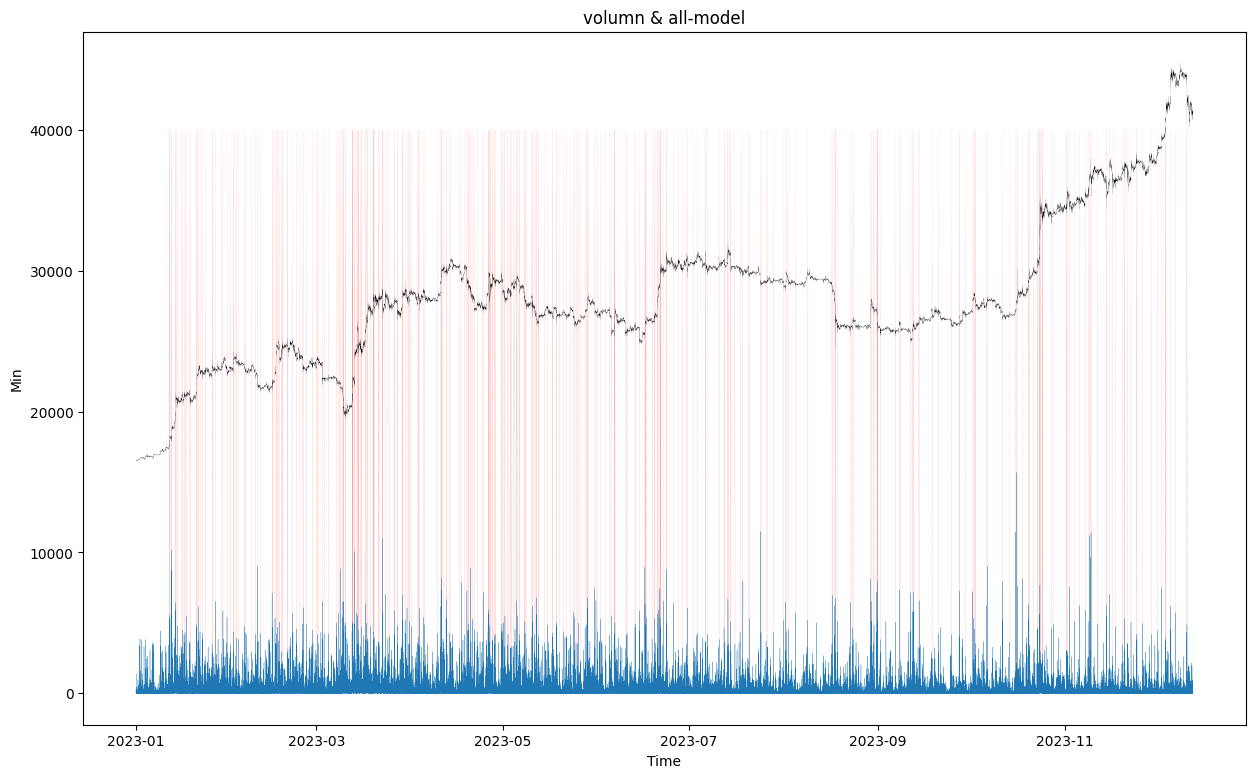

In [51]:
plt.figure(figsize=(15, 9))
plt.step(df.index, df['pred_volumn_all'], where='mid',linewidth=0.03,color = 'red')
plt.plot(df.index, df['volumn'],linewidth=0.2)
plt.plot(df.index, df['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('volumn & all-model')
plt.show()
#plt.savefig('/data/market_maker/plot/pred_2023_all.png')

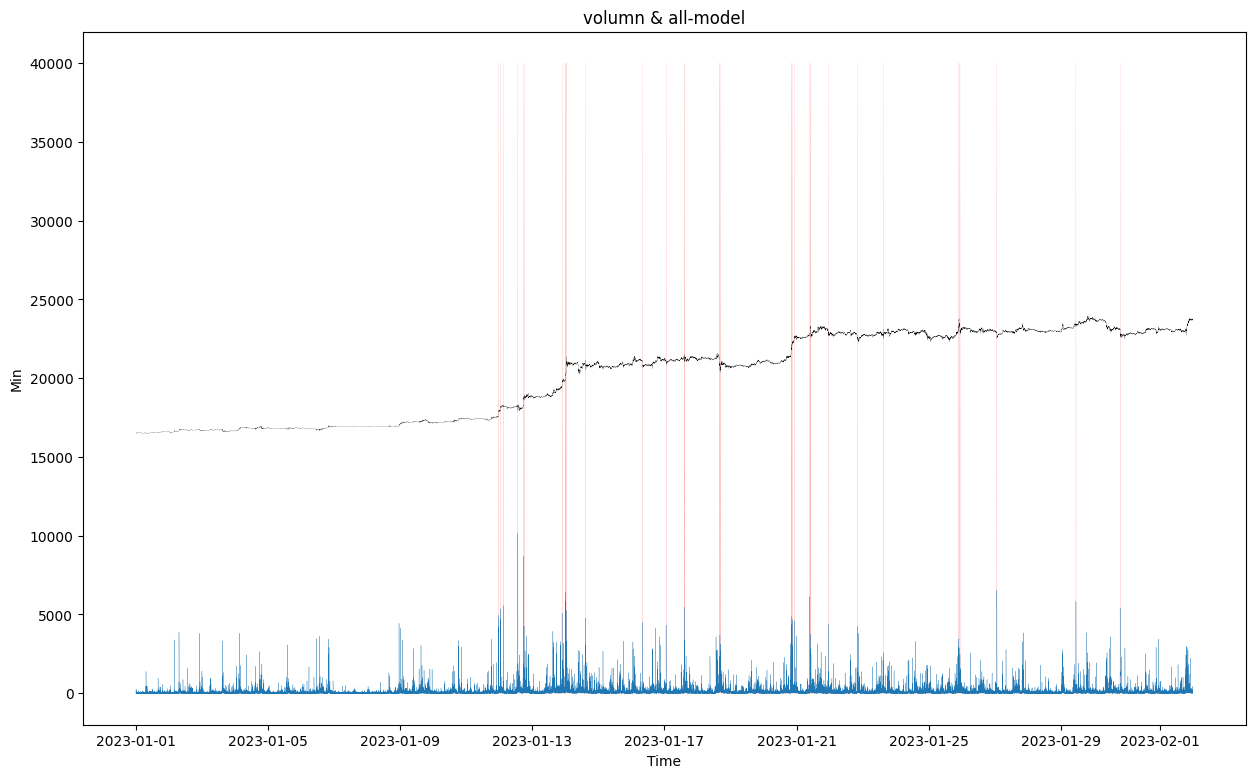

In [52]:
# 2023年一月
plt.figure(figsize=(15, 9))
df_01 = df[:'2023-02-01']
plt.step(df_01.index, df_01['pred_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_01.index, df_01['volumn'],linewidth=0.2)
plt.plot(df_01.index, df_01['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('volumn & all-model')
plt.show()

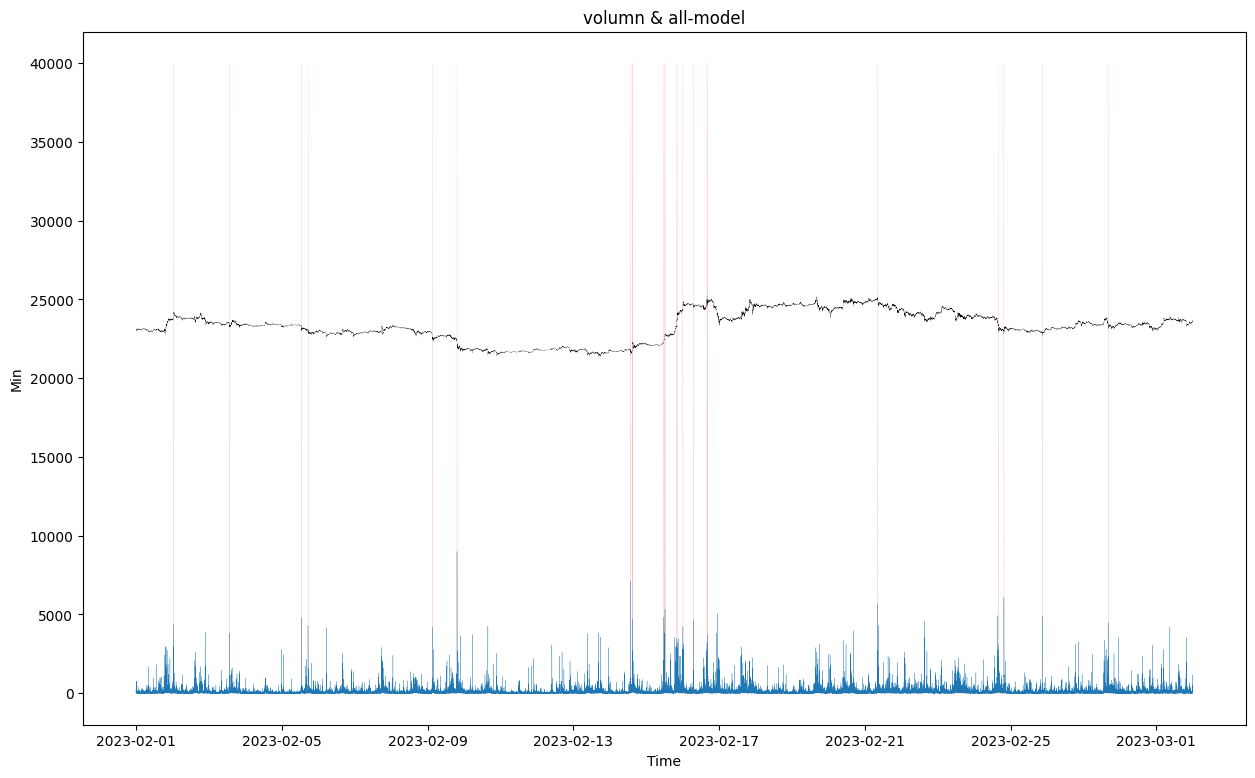

In [54]:
# 2023年2月
plt.figure(figsize=(15, 9))
df_02 = df['2023-02-01':'2023-03-01']
plt.step(df_02.index, df_02['pred_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_02.index, df_02['volumn'],linewidth=0.2)
plt.plot(df_02.index, df_02['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('volumn & all-model')
plt.show()

# volumn全1pct model:

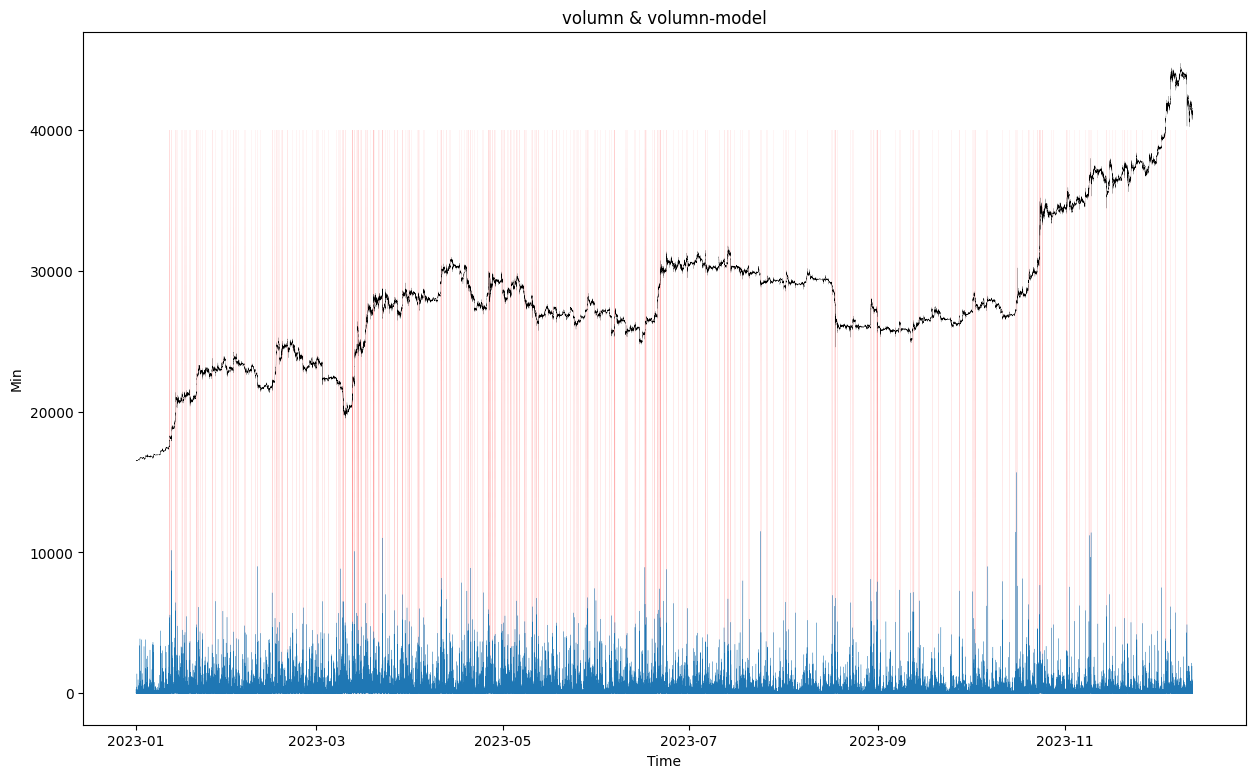

In [55]:
plt.figure(figsize=(15, 9))
plt.step(df.index, df['pred_volumn_all'], where='mid',linewidth=0.03,color = 'red')
plt.plot(df.index, df['volumn'],linewidth=0.2)
plt.plot(df.index, df['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('volumn & volumn-model')
plt.show()
#plt.savefig('/data/market_maker/plot/pred_2023_all.png')

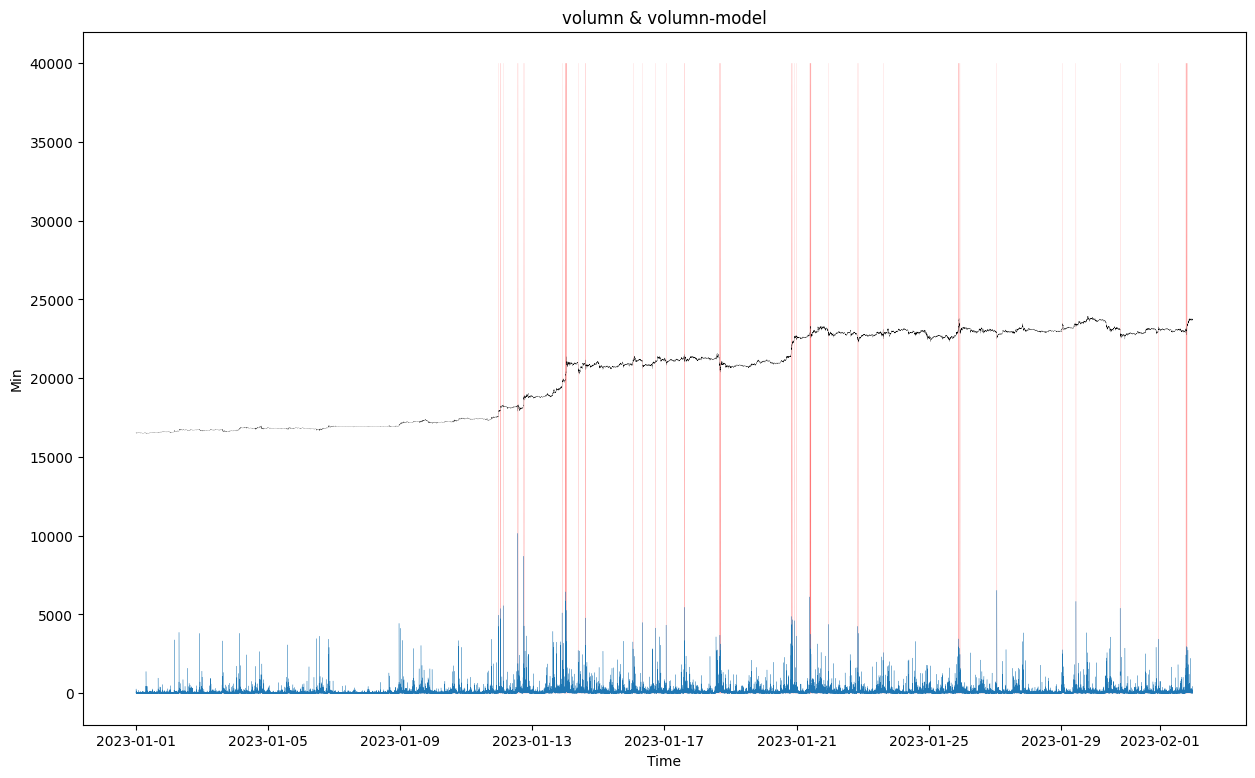

In [56]:
# 2023年一月
plt.figure(figsize=(15, 9))
plt.step(df_01.index, df_01['pred_volumn_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_01.index, df_01['volumn'],linewidth=0.2)
plt.plot(df_01.index, df_01['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('volumn & volumn-model')
plt.show()

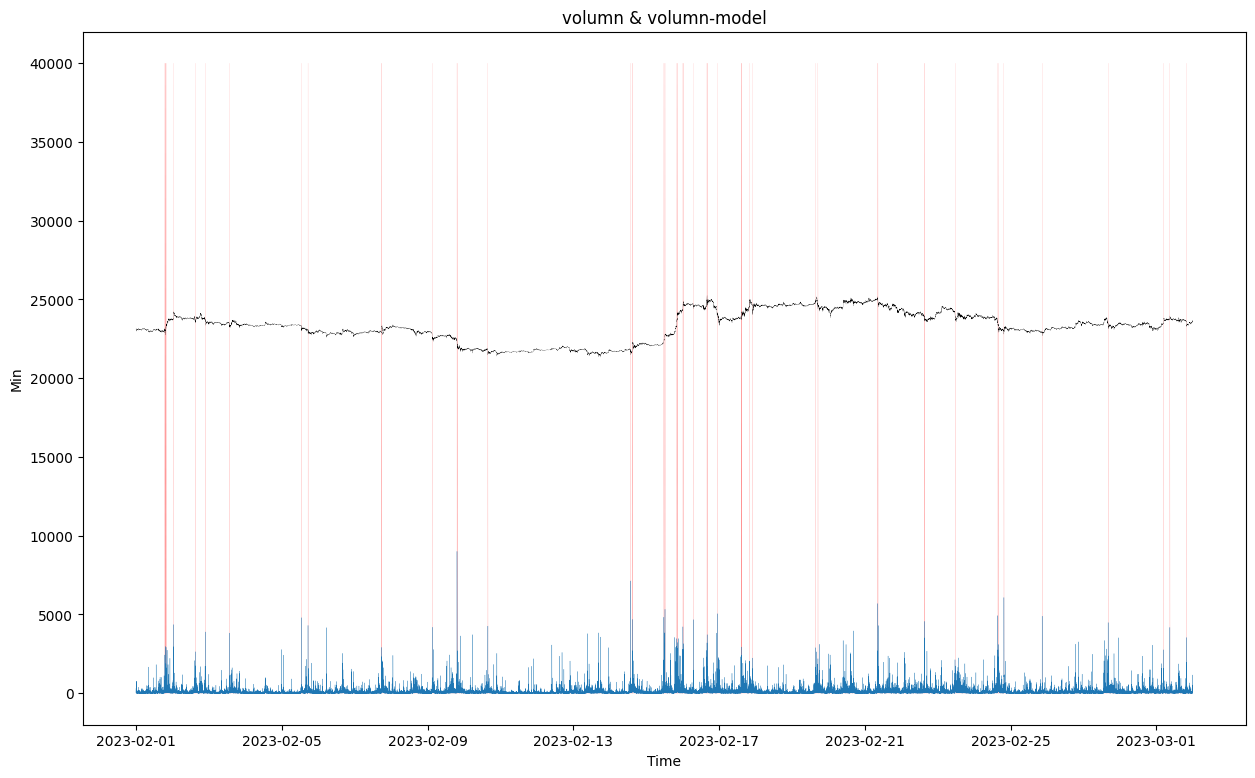

In [60]:
# 2023年2月
plt.figure(figsize=(15, 9))
plt.step(df_02.index, df_02['pred_volumn_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_02.index, df_02['volumn'],linewidth=0.2)
plt.plot(df_02.index, df_02['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('volumn & volumn-model')
plt.show()

# sell全1pct model:

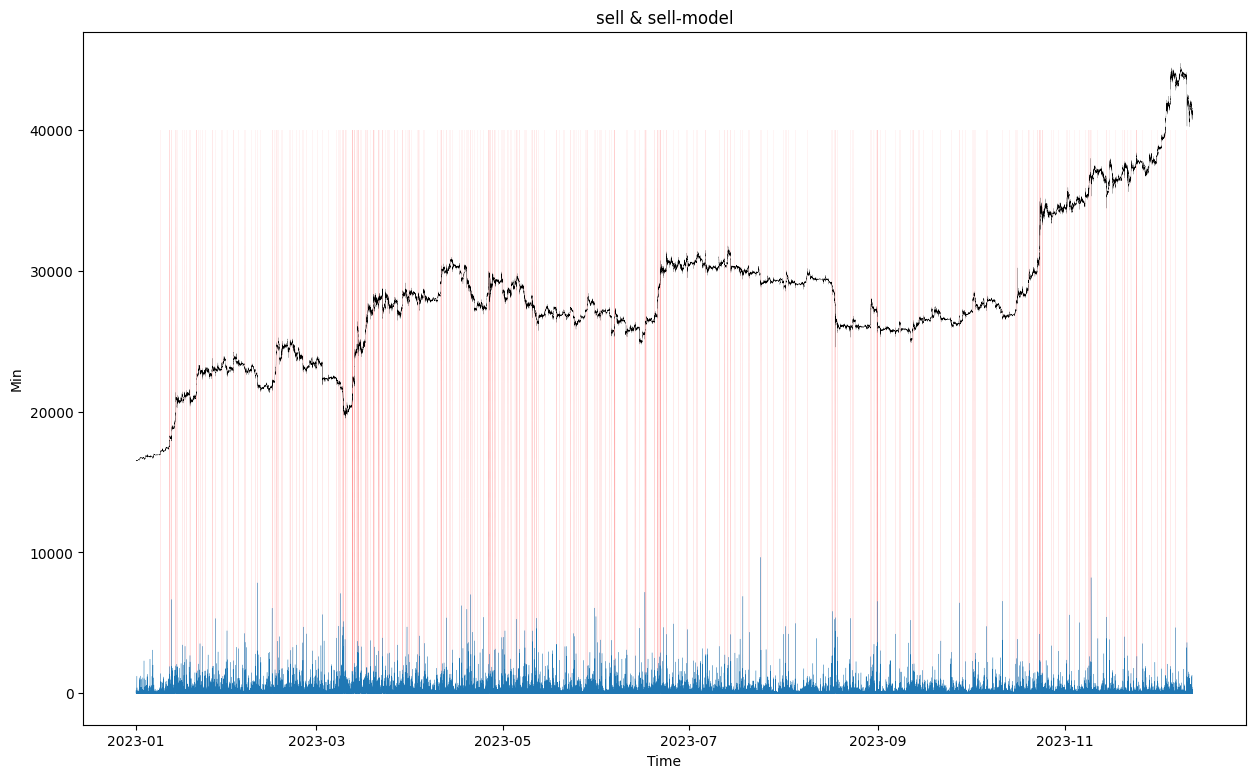

In [58]:
plt.figure(figsize=(15, 9))
plt.step(df.index, df['pred_sell_all'], where='mid',linewidth=0.03,color = 'red')
plt.plot(df.index, df['sell'],linewidth=0.2)
plt.plot(df.index, df['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('sell & sell-model')
plt.show()
#plt.savefig('/data/market_maker/plot/pred_2023_all.png')

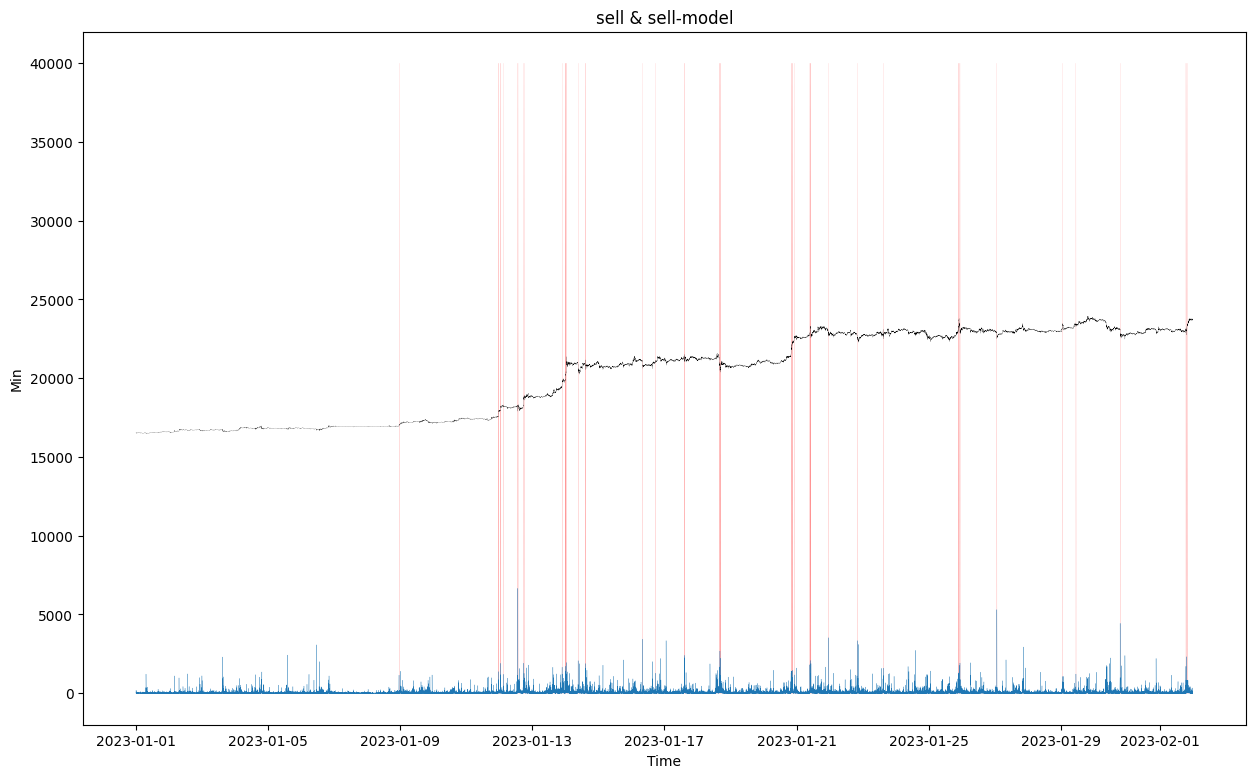

In [59]:
# 2023年一月
plt.figure(figsize=(15, 9))
plt.step(df_01.index, df_01['pred_sell_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_01.index, df_01['sell'],linewidth=0.2)
plt.plot(df_01.index, df_01['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('sell & sell-model')
plt.show()

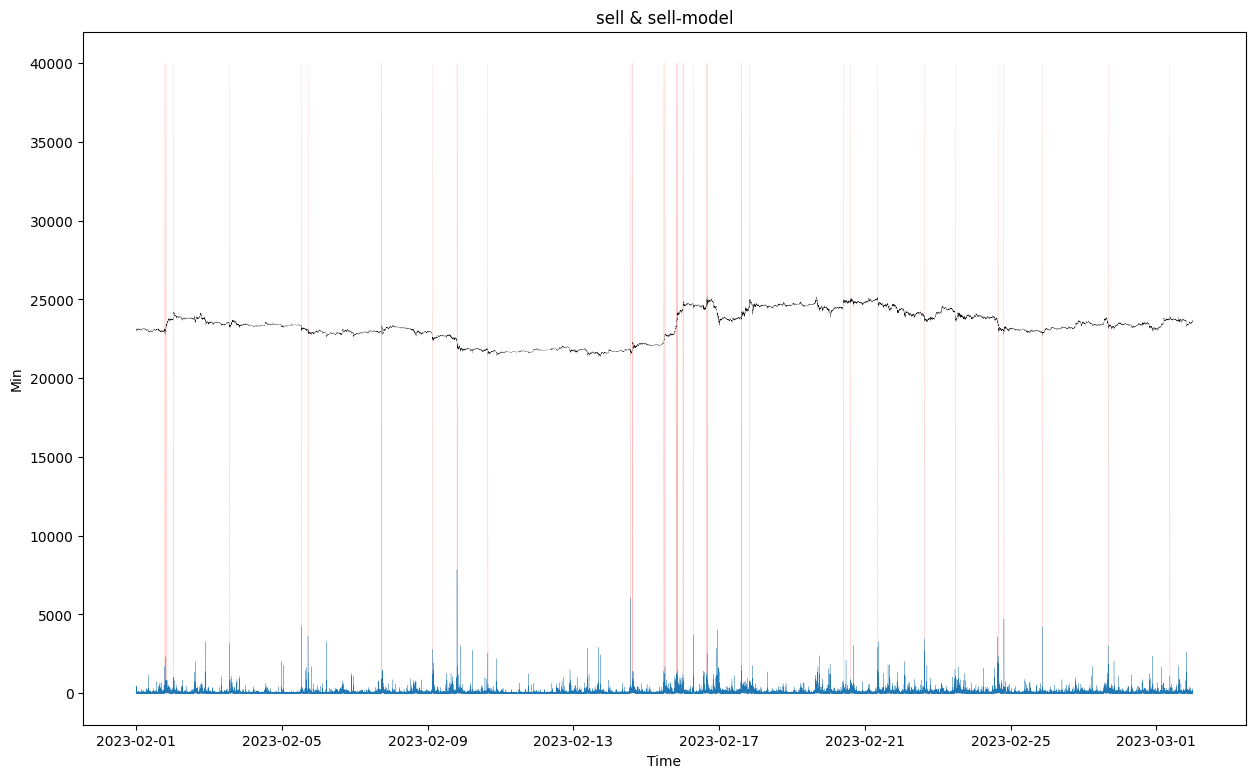

In [61]:
# 2023年2月
plt.figure(figsize=(15, 9))
plt.step(df_02.index, df_02['pred_sell_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_02.index, df_02['sell'],linewidth=0.2)
plt.plot(df_02.index, df_02['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('sell & sell-model')
plt.show()

# buy全1pct model:

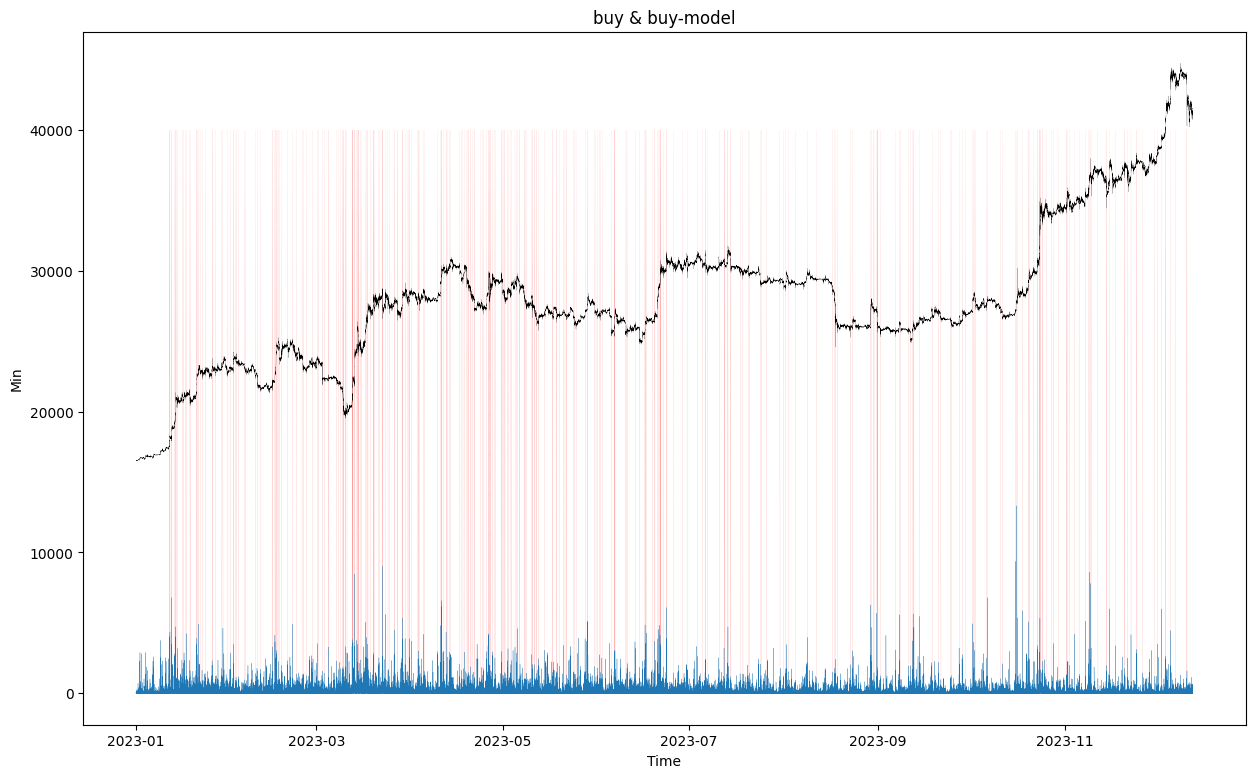

In [62]:
plt.figure(figsize=(15, 9))
plt.step(df.index, df['pred_buy_all'], where='mid',linewidth=0.03,color = 'red')
plt.plot(df.index, df['buy'],linewidth=0.2)
plt.plot(df.index, df['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('buy & buy-model')
plt.show()
#plt.savefig('/data/market_maker/plot/pred_2023_all.png')

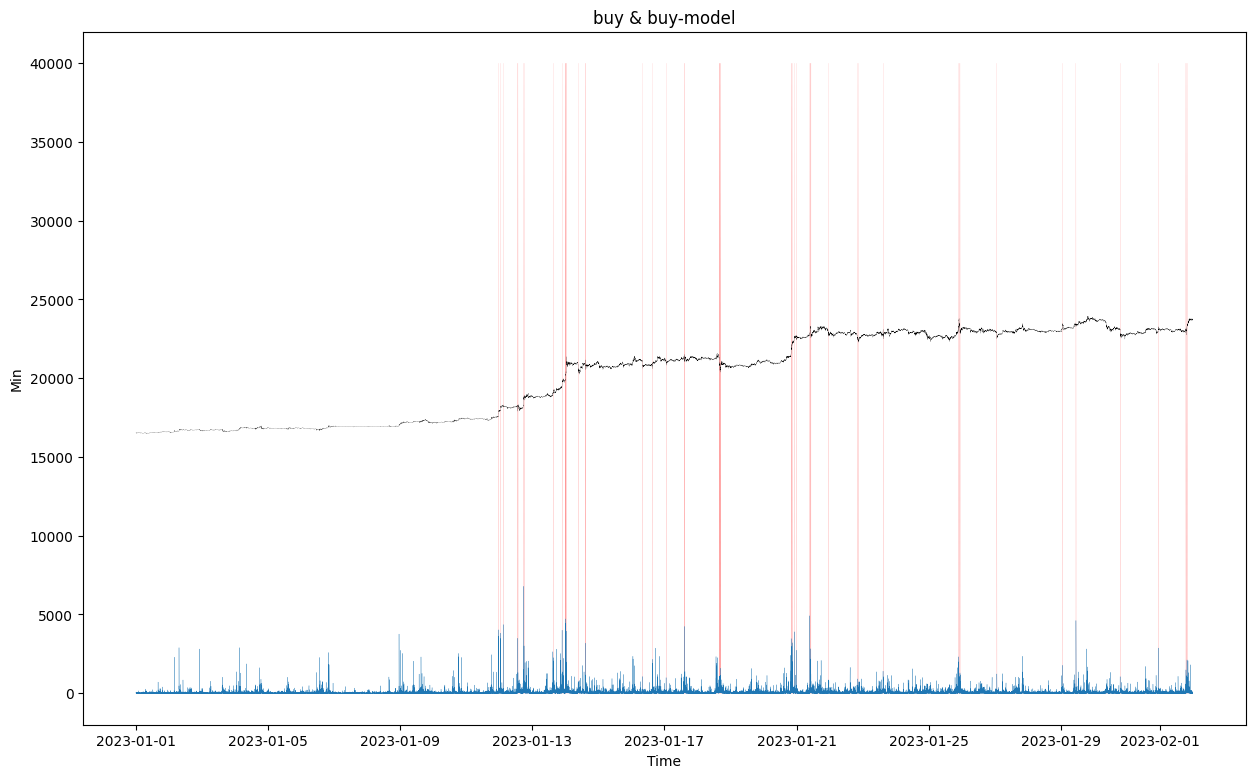

In [63]:
# 2023年一月
plt.figure(figsize=(15, 9))
plt.step(df_01.index, df_01['pred_buy_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_01.index, df_01['buy'],linewidth=0.2)
plt.plot(df_01.index, df_01['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('buy & buy-model')
plt.show()

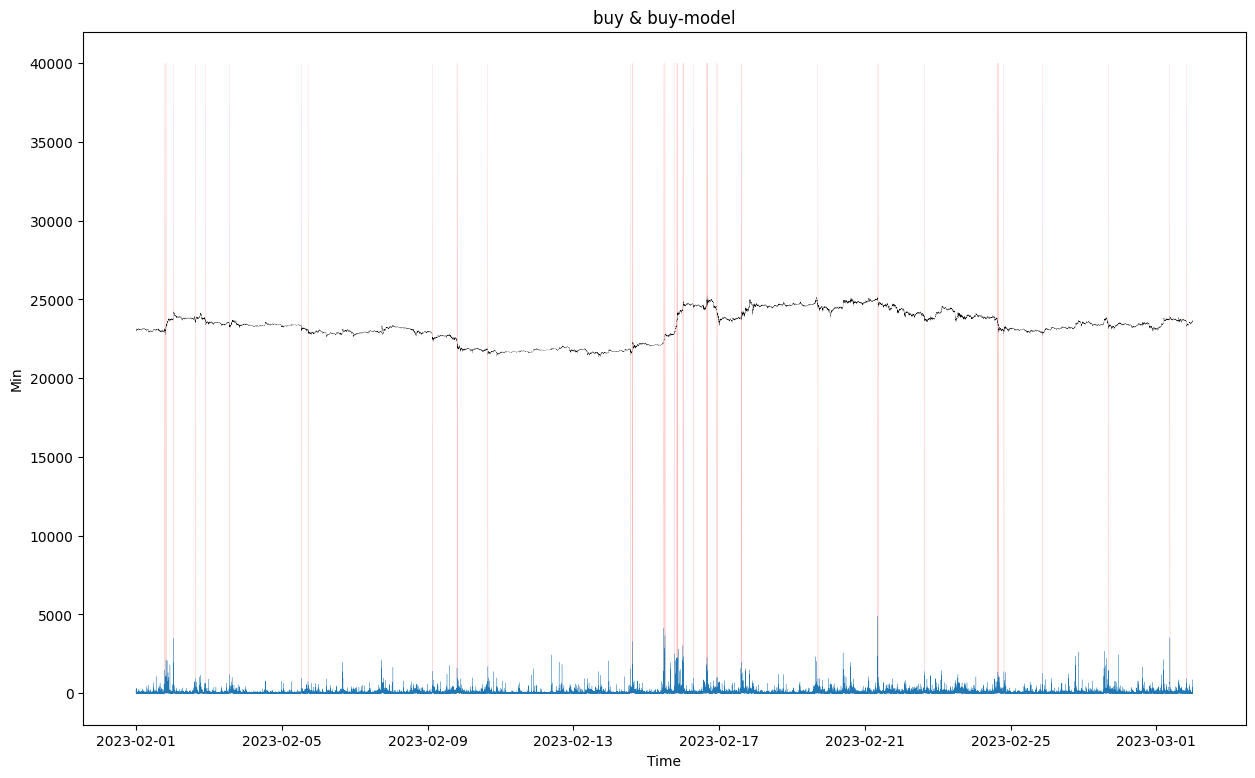

In [64]:
# 2023年2月
plt.figure(figsize=(15, 9))
plt.step(df_02.index, df_02['pred_buy_all'], where='mid',linewidth=0.05,color = 'red')
plt.plot(df_02.index, df_02['buy'],linewidth=0.2)
plt.plot(df_02.index, df_02['min'],linewidth=0.1,color = 'black')
plt.xlabel('Time')
plt.ylabel('Min')
plt.title('buy & buy-model')
plt.show()